In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats import binned_statistic

In [2]:
def plot_nobs_curve(filename, smooth_days=3):
    # runs avaialble at:  https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs1.4/baseline/
    conn = sqlite3.connect('../baseline/'+filename)
    df = pd.read_sql('select night,filter from summaryallprops;', conn)
    conn.close()

    bins=np.arange(-1, df['night'].max()+1, 1)+0.5
    # number of observations per night. np.searchsorted would be faster
    n_obs, be, bn = binned_statistic(df['night'], df['night'], bins=bins, statistic=np.size)

    day_bins = np.arange(-1,367, smooth_days)+0.5
    new_bins = (bins[0:-1]+.5) % 365
    running_mean, be, bn = binned_statistic(new_bins, n_obs, bins=day_bins, statistic=np.mean)
    running_max, be, bn = binned_statistic(new_bins, n_obs, bins=day_bins, statistic=np.max)
    running_med, be, bn = binned_statistic(new_bins, n_obs, bins=day_bins, statistic=np.median)
    running_sd, be, bn = binned_statistic(new_bins, n_obs, bins=day_bins, statistic=np.std)

    plt.plot(day_bins[0:-1]+.5, running_mean, label='mean')
    plt.plot(day_bins[0:-1]+.5, running_max, label='max')
    plt.plot(day_bins[0:-1]+.5, running_med, label='median')
    plt.xlabel('Day of Year')
    plt.ylabel('N observations per night')
    plt.legend()
    plt.title(filename[:-4])
    return day_bins, running_max

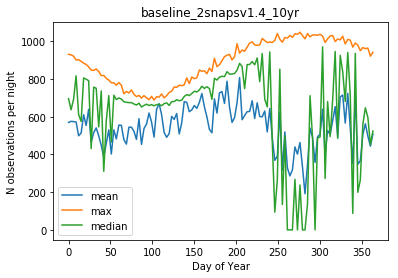

In [3]:
db1, rm1 = plot_nobs_curve('baseline_2snapsv1.4_10yrs.db')

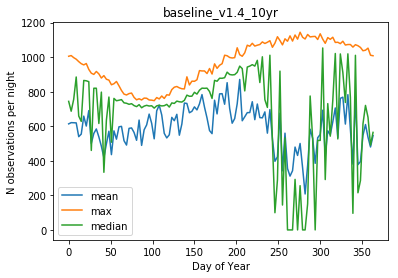

In [4]:
db2, rm2 = plot_nobs_curve('baseline_v1.4_10yrs.db')

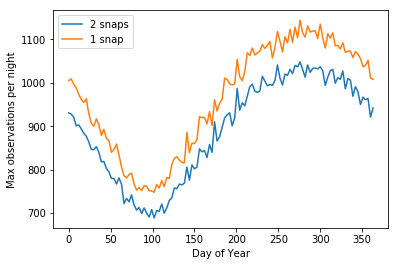

In [5]:
plt.plot(db1[0:-1]+.5, rm1, label='2 snaps')
plt.plot(db2[0:-1]+.5, rm2, label='1 snap')
plt.xlabel('Day of Year')
plt.ylabel('Max observations per night')
plt.legend()